# Problema 4: Stable System

## Calcular la trayectoría determinista $x(t)$ con la condición inicial $x(0)=0$

Del sistema simple con síntesis constante y degradación lineal:

$$x \xrightarrow{\nu_1} x + 1, \nu_1 = \alpha$$
$$x \xrightarrow{\nu_2} x -1, \nu_2 = \beta \cdot x$$

se pide calcular la trayectoria determinista para $x(t)$ con la condición inicial $x(0)=0$.

Para ello, note que se tiene $i=1$ especie, y $j=2$ reacciones, por lo que la matriz estequiométrica está dada por

$$ S = \begin{bmatrix} 1 & -1 \end{bmatrix}$$

Además, las propensiones son:

$$ \nu_1 (\vec{n}) = \alpha $$
$$ \nu_2 (\vec{n}) = \beta x$$

tal que el vector de propensiones $\vec{\nu}$ está dado por

$$ \vec{\nu} = \begin{pmatrix} \alpha  \\ \beta x \end{pmatrix}$$

Así, note que el comportamiento determinista del sistema está dado por la siguiente EDO

$$ \dfrac{dx}{dt} = \alpha - \beta x$$

### Se grafica la trayectoria de la solución a la EDO (ver PDF anexado en la tarea para desarrollo)

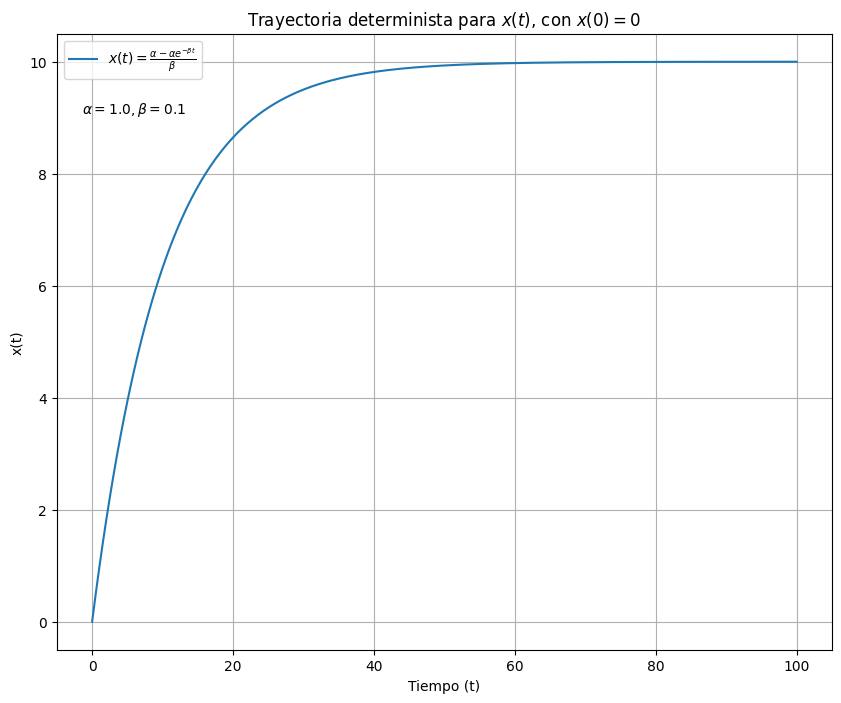

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
a = 1.0
b = 0.1

# Se define la función x(t)
def x_t(t, a, b):
    return (a - a * np.exp(-b * t)) / b

#Se crea el rango de valores para t
t = np.linspace(0, 100, 400)

# Se evalua la función x(t)
x = x_t(t, a, b)

# Graficar la función
plt.figure(figsize=(10, 8))
plt.plot(t, x, label=r'$x(t) = \frac{\alpha - \alpha e^{-\beta t}}{\beta}$')
plt.figtext(.15, .78, r'$\alpha = 1.0, \beta= 0.1$') # para añadir un cuadro con los parámetros utilizados
plt.title('Trayectoria determinista para $x(t)$, con $x(0)=0$')
plt.xlabel('Tiempo (t)')
plt.ylabel('x(t)')
plt.grid(True)
plt.legend()
plt.show()

## Generar y graficar simulaciones estocásticas para números de moléculas que van desde $10$ hasta $10^3$, normalizandonos al valor del estado estacionario

Se utiliza el algoritmo de Gillespie para las simulaciones estocásticas.

Para el histograma usando la desviación estandar, no daba una distribución en particular, por lo cual se interpolan los tiempos de ambas soluciones para poder obtener las fluctuaciones a partir de la diferencia entre la solución estocástica interpolada y la solución determinista normalizada.

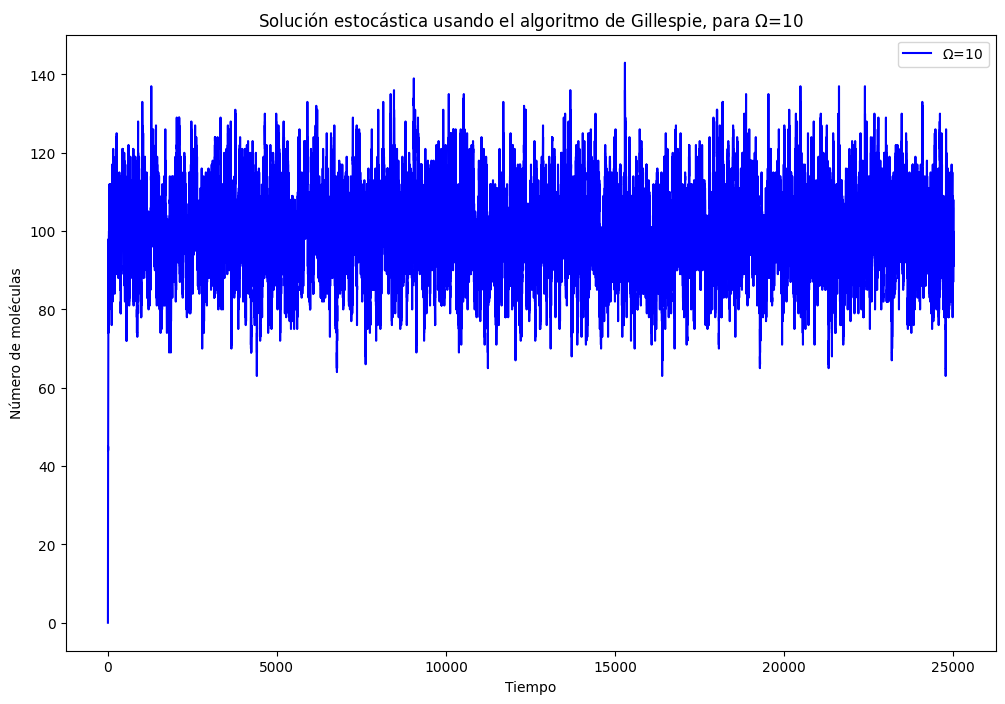

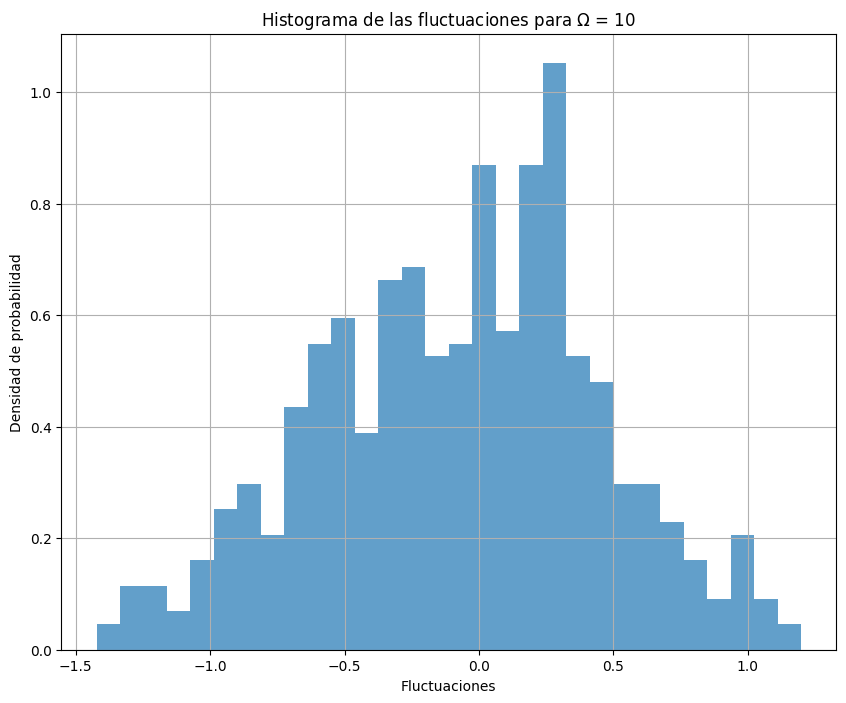

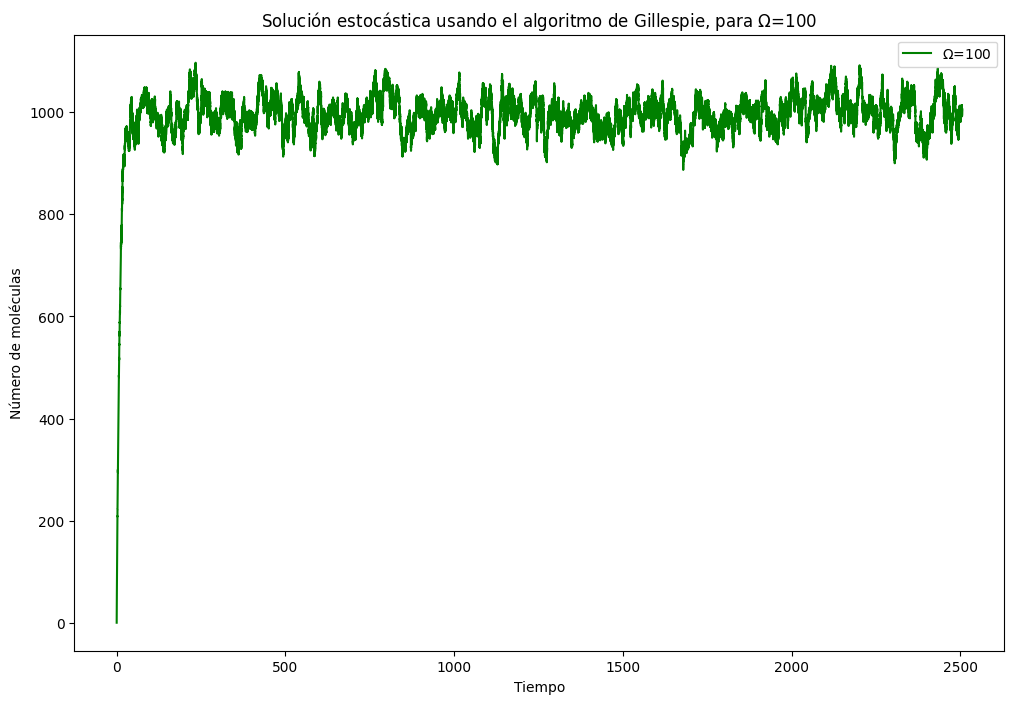

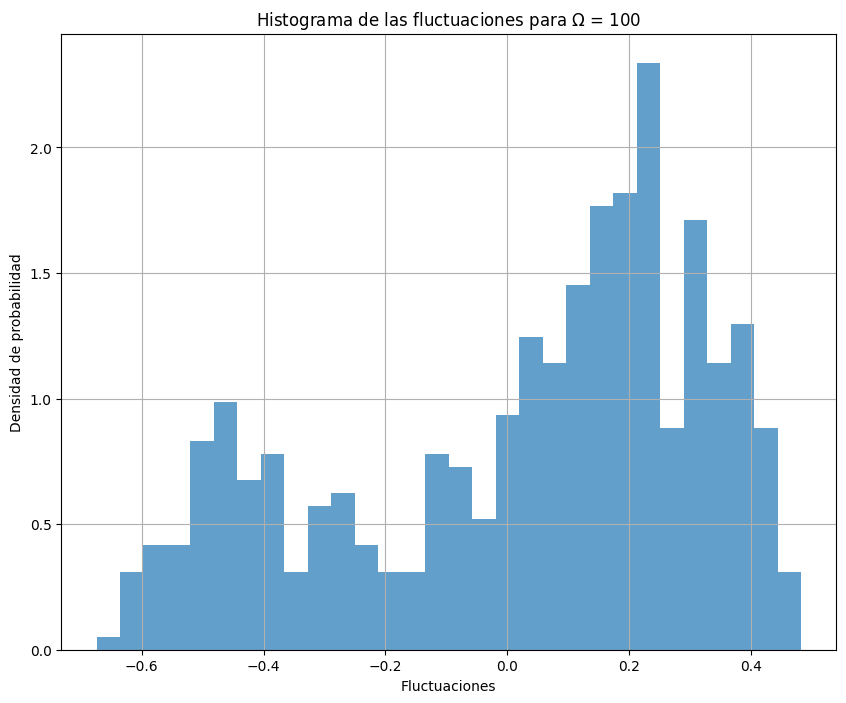

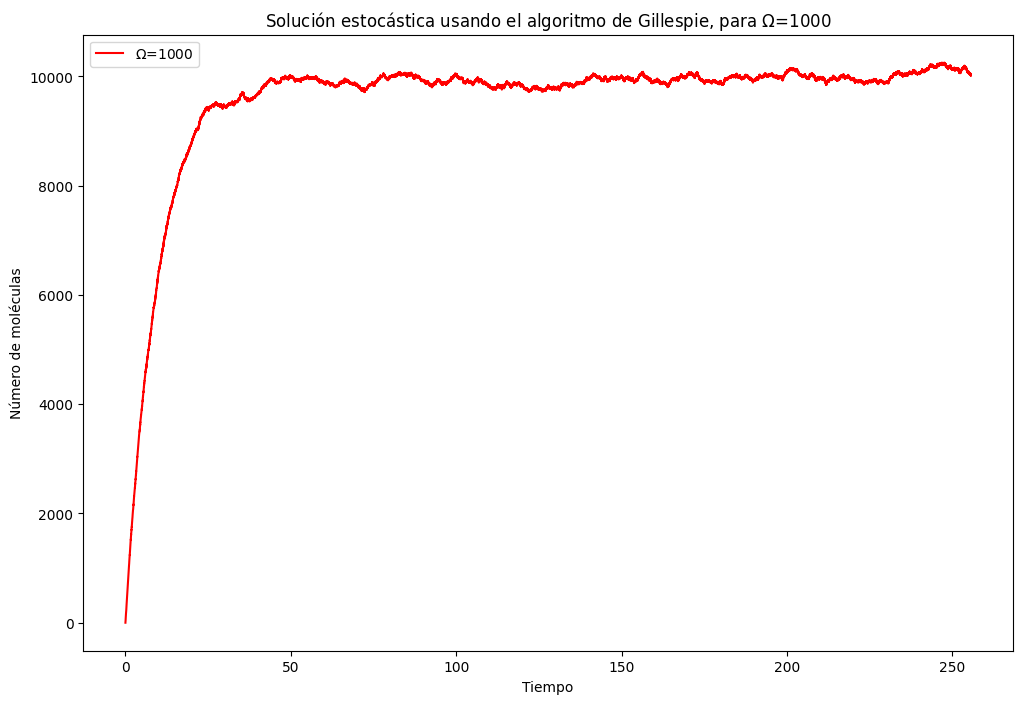

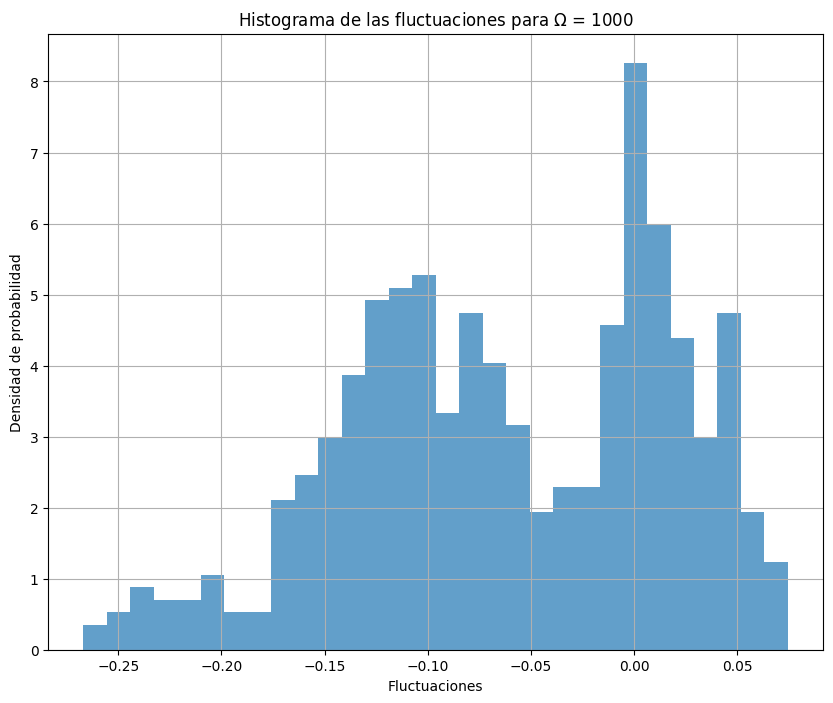

In [2]:
# Importamos las librerías necesarias
import numpy as np
import math
import random as rnd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Condiciones iniciales
t0 = 0.0
X0 = 0.0

# Parámetros
alpha = 1.0  # Tasa de síntesis
beta = 0.1   # Tasa de degradación
Omegas = [10, 100, 1000]  # Números de moléculas
Steps = 500000  # Número de pasos del algoritmo de Gillespie
colores = ['b', 'g', 'r']  # Lista de colores para cada omega

# Se define la matriz estequiométrica
S = [[1., -1.]]

# Función para generar un número aleatorio de distribución exponencial
def dist_exp(a):
    r = rnd.random()  # Número aleatorio de distribución uniforme
    return -(1. / a) * math.log(r)  # Transformación a distribución exponencial

# Función para elegir una reacción basada en las propensiones ni
def dist_reaction(ni, A):
    r = rnd.random()  # Número aleatorio de distribución uniforme
    if r < ni[0] / A:  # Selección de reacción 1
        return 0
    else:  # Selección de reacción 2
        return 1

t_max = 100
t_span = (0, t_max)

# Se define la ecuación determinista
def deterministic_eq(t,x):
    return omega* (alpha - beta * x/omega)

def plot_histogram(omega):
    # Se soluciona la EDO
    deterministic_solution = solve_ivp(deterministic_eq, t_span, y0 = [0], t_eval=np.linspace(0, t_max, 1000))

    # Se interpolan los tiempos de la solucion determinista y del algoritmo de Gillespie
    n_interp = np.interp(deterministic_solution.t, time, Y)

    # Queremos que la interpolación realizada arriba contemple solo los tiempos mayores a 50, 
    # suponiendo que después de ese tiempo ya debería estar alncanzando el estado estacionario, 
    # por lo cual obtenemos un array de booleanos que cumplan dicha condición 
    steady_state_idx = deterministic_solution.t > 50

    # Con dicho array, obtenemos las fluctuaciones como la diferencia entre la solución estocástica interpolada
    # y la solución determinista normalizada
    fluctuations = (n_interp[steady_state_idx]/omega) - (deterministic_solution.y[0][steady_state_idx] / omega)
    # Se grafican las fluctuaciones con una distribución normal
    plt.figure(figsize=(10,8))
    plt.hist(fluctuations, bins=30, density=True, alpha=0.7)
    plt.xlabel('Fluctuaciones')
    plt.ylabel('Densidad de probabilidad')
    plt.title(f'Histograma de las fluctuaciones para $\Omega$ = {omega}')
    plt.grid(True)
    plt.show()

# Ejecutamos el algoritmo de Gillespie para cada valor de omega
# idx es el índice usado en los colores para diferenciar las gráficas
for idx, omega in enumerate(Omegas):
    Y = np.zeros(Steps + 1)
    time = np.zeros(Steps + 1)
    Y[0] = X0

    for i in range(Steps):
        ni = np.array([alpha * omega, beta * Y[i]])
        a = sum(ni)
        tau = dist_exp(a)
        mu = dist_reaction(ni, a)
        Y[i + 1] = Y[i] + S[0][mu]
        time[i + 1] = time[i] + tau

    # Crear una nueva figura para cada valor de omega
    plt.figure(figsize=(12, 8))
    plt.plot(time, Y, label=f'$\Omega$={omega}', color=colores[idx])
    plt.xlabel('Tiempo')
    plt.ylabel('Número de moléculas')
    plt.title(f'Solución estocástica usando el algoritmo de Gillespie, para $\Omega$={omega}')
    plt.legend()
    # Mostrar la figura correspondiente a cada omega
    plt.show()
    # Gráfica del histograma para cada valor de omega
    plot_histogram(omega)